# Linear Regression, Car Data

In [44]:
# Warnings
import warnings
warnings.simplefilter(action='ignore')

In [45]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.express as px
from enum import Enum

In [46]:
#//////// Ask the Jupyter notebook to print the value of all the variables in the cell and not just the last one.\\\\\\\\
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#///////////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

In [47]:
# Import data

data = pd.read_csv('/kaggle/input/cardekho/car data (1).csv')
data;

In [48]:
# Convert data to a DataFrame

df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Pre-Processing

In [49]:
# To check if there is any NaN data

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [50]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [51]:
# Creating a column named Age using the max(year){here 2018} + 1

df["Age"] = 2019 - df['Year'] # Age of each car

In [52]:
# Changing the index of the column Age

Age = df.pop('Age')
df.insert(1, 'Age', Age)
df

,Car_Name,Age,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,5,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,6,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,8,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,5,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,3,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,4,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,10,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [53]:
# Delete the Car_Name and Year columns

df.drop('Car_Name',axis = 'columns', inplace = True)
df.drop('Year',axis = 'columns', inplace = True)

In [54]:
# Unique categori in categorical features

print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [55]:
# Number of unique values in each categorical features

data['Fuel_Type'].value_counts()
data['Seller_Type'].value_counts()
data['Transmission'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [56]:
df.dtypes

Age                int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [57]:
DF = df.copy()

In [58]:
# Converting categorical features to number using replace function
# According to data, diesel price was higher than the other two, so I dedicated number 3 for diesel, 
# 2 for petrol and 1 for cng respectively. The same was done for other features.

DF['Fuel_Type'].replace(['Petrol', 'Diesel', 'CNG'],[2, 3, 1], inplace=True)
DF['Seller_Type'].replace(['Dealer', 'Individual'],[2, 1], inplace=True)
DF['Transmission'].replace(['Manual', 'Automatic'],[1, 2], inplace=True)

<Figure size 1080x720 with 0 Axes>

[Text(0.5, 1.0, 'Correlation matrix of the data\n')]

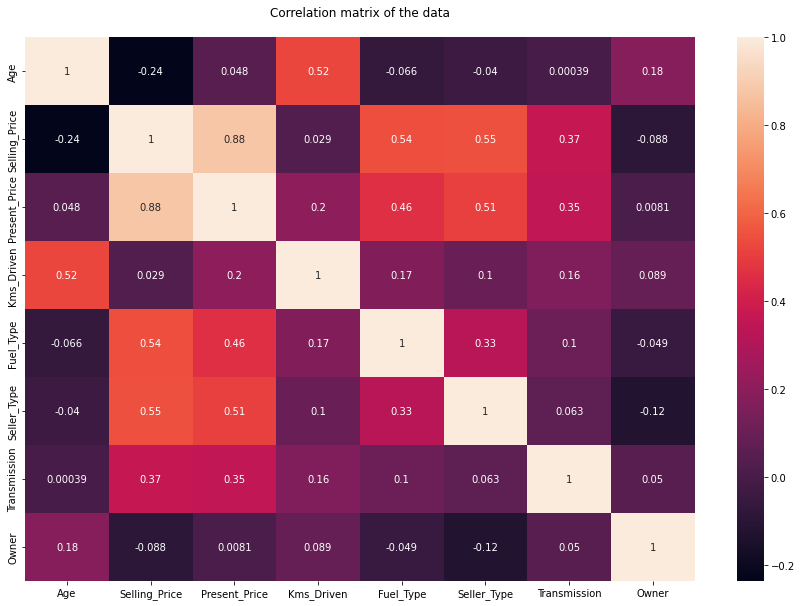

In [59]:
# Heatmap: correlation of all features and Target

plt.figure(figsize = (15, 10))
hm = sns.heatmap(DF.corr(), annot = True)
hm.set(title = "Correlation matrix of the data\n")
plt.show()

### Plotting each feature vs target ("Selling_Price")

In [60]:
fig = px.line(df, x="Age", y="Selling_Price", color="Fuel_Type", title="Age-Price")
fig.update_traces(mode="markers")

fig.show();

In [61]:
fig = px.line(df, x="Present_Price", y="Selling_Price", color="Fuel_Type", title="Present_Price-Price")
fig.update_traces(mode="markers")
fig.show();

In [62]:
fig = px.line(df, x="Kms_Driven", y="Selling_Price", color="Fuel_Type", title="Kms_Driven-Price")
fig.update_traces(mode="markers")
fig.show();

In [63]:
fig = px.line(df, x="Owner", y="Selling_Price", color="Fuel_Type", title="Owner-Price")
fig.update_traces(mode="markers")
fig.show();

In [64]:
fig = px.line(df, x="Owner", y="Kms_Driven", color="Fuel_Type", title="Owner-Kms_Driven")
fig.update_traces(mode="markers")
fig.show();

In [65]:
fig = px.line(df, x="Fuel_Type", y="Selling_Price", color="Fuel_Type", title="Fuel_Type-Price")
fig.update_traces(mode="markers")
fig.show();

In [66]:
fig = px.line(df, x="Seller_Type", y="Selling_Price", color="Fuel_Type", title="Seller_Type-Price")
fig.update_traces(mode="markers")
fig.show();

In [67]:
fig = px.line(df, x="Transmission", y="Selling_Price", color="Fuel_Type", title="Transmission-Price")
fig.update_traces(mode="markers")
fig.show();

### As we can see in the above figures, there is some noise in data which shoud be removed from dataset to get proper results.

### Dropping Noisy values:

In [68]:
i1 = DF[DF['Selling_Price'] == 35].index
i2 = DF[DF['Selling_Price'] == 33].index
i3 = DF[DF['Selling_Price'] == 0.17].index # KMS ----> 500k
i1, i2 , i3

(Int64Index([86], dtype='int64'),
 Int64Index([64], dtype='int64'),
 Int64Index([196], dtype='int64'))

In [69]:
DF.drop(df.index[[86,64, 196]], inplace = True)

In [70]:
DF

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,1,0
1,6,4.75,9.54,43000,3,2,1,0
2,2,7.25,9.85,6900,2,2,1,0
3,8,2.85,4.15,5200,2,2,1,0
4,5,4.60,6.87,42450,3,2,1,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,1,0
297,4,4.00,5.90,60000,2,2,1,0
298,10,3.35,11.00,87934,2,2,1,0
299,2,11.50,12.50,9000,3,2,1,0


# Normalizing data

#### When we use sklearn, we don't need to normaliza data, because the sklearn do it itself. Here I jast wanted to show how to normalize and denormalize the data:

In [71]:
dfNormal = DF.copy()

In [72]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm = scaler.fit_transform(dfNormal)
DF_N = pd.DataFrame(Norm, columns = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 
                                     'Fuel_Type', 'Seller_Type','Transmission', 'Owner'])
DF_N.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.138889,0.147868,0.124706,0.5,1.0,0.0,0.0
1,0.333333,0.198718,0.258698,0.200000,1.0,1.0,0.0,0.0
2,0.066667,0.305556,0.267396,0.030118,0.5,1.0,0.0,0.0
3,0.466667,0.117521,0.107464,0.022118,0.5,1.0,0.0,0.0
4,0.266667,0.192308,0.183782,0.197412,1.0,1.0,0.0,0.0


# Denormalizing

In [73]:
unscaled = scaler.inverse_transform(Norm)
unscaled

array([[ 5.  ,  3.35,  5.59, ...,  2.  ,  1.  ,  0.  ],
       [ 6.  ,  4.75,  9.54, ...,  2.  ,  1.  ,  0.  ],
       [ 2.  ,  7.25,  9.85, ...,  2.  ,  1.  ,  0.  ],
       ...,
       [10.  ,  3.35, 11.  , ...,  2.  ,  1.  ,  0.  ],
       [ 2.  , 11.5 , 12.5 , ...,  2.  ,  1.  ,  0.  ],
       [ 3.  ,  5.3 ,  5.9 , ...,  2.  ,  1.  ,  0.  ]])

In [74]:
De_Norm_DF = pd.DataFrame(unscaled, columns = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 
                                               'Fuel_Type', 'Seller_Type','Transmission', 'Owner'])
De_Norm_DF

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,3.35,5.59,27000.0,2.0,2.0,1.0,0.0
1,6.0,4.75,9.54,43000.0,3.0,2.0,1.0,0.0
2,2.0,7.25,9.85,6900.0,2.0,2.0,1.0,0.0
3,8.0,2.85,4.15,5200.0,2.0,2.0,1.0,0.0
4,5.0,4.60,6.87,42450.0,3.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...
293,3.0,9.50,11.60,33988.0,3.0,2.0,1.0,0.0
294,4.0,4.00,5.90,60000.0,2.0,2.0,1.0,0.0
295,10.0,3.35,11.00,87934.0,2.0,2.0,1.0,0.0
296,2.0,11.50,12.50,9000.0,3.0,2.0,1.0,0.0


# Let's start modelling:

Data for Training: (238, 7)
Data for Testing: (60, 7) 

Accuracy of fitted model: 0.9316345991536211 

Mean Absolute Error:  0.8106946693579686
Mean Squared Error:  1.2004301928444727
Root Mean Squared Error:  1.0956414526862666
R2 Score (test):  0.9471060036735118 

R2 Score (train):  0.8756107297738384 

Model Intercept:  [-2.30124084]
Model Coefs:  [[-2.97614756e-01  5.14421325e-01 -2.17351287e-05  1.58930257e+00
   8.36077224e-01  5.23656396e-01 -9.46385672e-01]] 



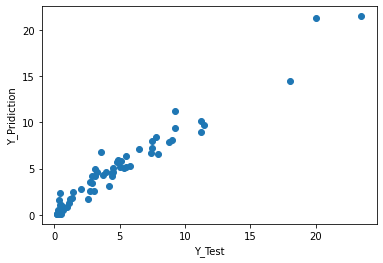

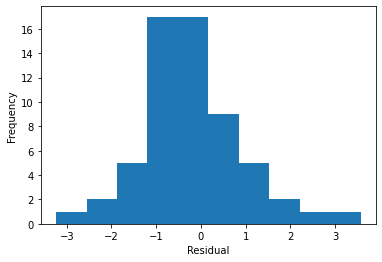

In [75]:
X = pd.DataFrame(DF, columns = ['Age', 'Present_Price', 'Kms_Driven',
                                  'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
Y = DF['Selling_Price'].values.reshape(-1, 1)

def modelcar(x , y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    
    print('Data for Training: ' + str(x_train.shape))
    print('Data for Testing: ' + str(x_test.shape), '\n')
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    result = model.score(x_test, y_test)
    print("Accuracy of fitted model:", result, '\n')
    
    y_t_pred = model.predict(x_train)
    
    y_new = model.predict(x_test) 
    y_pred = []
    
    # avoiding negative number in output:
    for i in y_new:
        if i >= 0:
            y_pred.append(i)
        if i < 0:
            y_pred.append(np.array([0.1]))
                      
    y_pred = np.array(y_pred)        
    #print(y_pred, '\n')
    #print(y_test)
            
            
    #print(pd.DataFrame({'Actual':y_test.flatten(), 'Predict':y_pred.flatten()}))
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2 Score (test): ", metrics.r2_score(y_test, y_pred), '\n')
    print("R2 Score (train): ", metrics.r2_score(y_train, y_t_pred), '\n')
    print("Model Intercept: ", model.intercept_)
    print("Model Coefs: ", model.coef_, '\n')
    
    Y_test = y_test.flatten()
    Y_pred = y_pred.flatten()
    
    fig1 = plt.figure("Figure 1")
    plt.scatter(Y_test, Y_pred)
    plt.xlabel('Y_Test')
    plt.ylabel('Y_Pridiction')
    
    fig2 = plt.figure("Figure 2")
    plt.hist(y_test - y_pred) # residuals
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    
    plt.show()

modelcar(X,Y)

# Predicting car price using given data:

Given Data::: 
Age: 10,,
Present_Price: 11.23,,
Kms_Driven: 42000,,
Owner: 1,,
Fuel_Type: Petrol,,
Seller_Type: Dealer,,
Transmission: Manual

In [76]:
# This cell dosen't work in Kaggle because it includes 'input' code! It is working in your notebook. :)
# The output will be:  4.014717986350002

"""

Age = float(input('The Age is: '))
Present_Price = float(input('The Present_Price is: '))
Kms_Driven = float(input('The Kms_Driven is: '))
Owner = float(input('The Owner is: '))


class Fuel(Enum):
    Petrol = 2
    Diesel = 3
    CNG = 1 
Fuel_Type = (input('The Fuel_Type is (Petrol/Deisel/CNG): '))
f = (Fuel[Fuel_Type].value)


class Seller(Enum):
    Individual = 1
    Dealer = 2
Seller_Type = (input('The Seller_Type is(Individual/Dealer): '))
s = (Seller[Seller_Type].value)


class Trans(Enum):
    Manual = 1
    Automatic = 2
Transmission = (input('The Transmission is(Manual/Automatic): '))
t = (Trans[Transmission].value)


Reg_Eq = (-2.30124084 + (-2.97614756e-01 * Age) + (5.14421325e-01 * Present_Price) + (-2.17351287e-05 * Kms_Driven)
      + (1.58930257e+00 * f) + (8.36077224e-01 * s) + (5.23656396e-01 * t)
      + (-9.46385672e-01 * Owner))
print()
print('The output is: ', Reg_Eq)

"""

The Age is: 10
The Present_Price is: 11.23
The Kms_Driven is: 42000
The Owner is: 1
The Fuel_Type is (Petrol/Deisel/CNG): Petrol
The Seller_Type is(Individual/Dealer): Dealer
The Transmission is(Manual/Automatic): Manual

The output is:  4.014717986350002


## Using whole data as Training:

In [77]:
df2 = pd.DataFrame({"Year": [2009],
                   "Age": [10],
                   "Present_Price": [11.23],
                   "Owner": [1],
                   "Kms_Driven": [42000],
                   "Fuel_Type": [2],
                   "Seller_Type": [2],
                   "Transmission": [1],
                   "Selling_Price": [3]})

In [78]:
DF2 = DF.append(df2)

In [79]:
X_train1 = DF2 [['Age', 'Present_Price', 'Kms_Driven', 'Owner',
                'Fuel_Type', 'Seller_Type', 'Transmission']][:298]
Y_train1 = DF2 [["Selling_Price"]][:298].values.reshape(-1, 1)

In [80]:
X_test1 = DF2 [['Age', 'Present_Price', 'Kms_Driven', 'Owner',
                'Fuel_Type', 'Seller_Type', 'Transmission']][298:]

In [81]:
model2 = LinearRegression()
model2.fit(X_train1 , Y_train1)

LinearRegression()

In [82]:
y_pred2 = model2.predict(X_test1)
print('The output is: ', y_pred2.flatten())

The output is:  [4.23725899]


#### Cross validation results was not satisfying and so not used in the  final modelling process, but here is the code:

[0.79319395 0.89911894 0.87487132 0.70185063 0.80171086 0.84956522
 0.94785269 0.93400778 0.85511032 0.9422269  0.86357429 0.82808898
 0.93994998 0.47943392 0.47370052] 

0.8122837528949689 

     Age  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
16     4           7.25          10.79       41678          3            2   
17     3           7.75          10.79       43000          3            2   
18     4           3.25           5.09       35500          1            2   
19     9           2.65           7.98       41442          2            2   
20     3           2.85           3.95       25000          2            2   
..   ...            ...            ...         ...        ...          ...   
296    3           9.50          11.60       33988          3            2   
297    4           4.00           5.90       60000          2            2   
298   10           3.35          11.00       87934          2            2   
299    2          11.50     

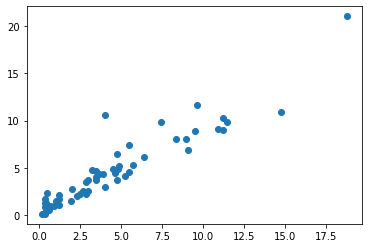

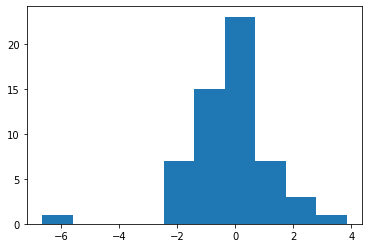

In [83]:
def crossvalidation():
    X = pd.DataFrame(DF, columns = ['Age', 'Present_Price', 'Kms_Driven', 'Owner',
                                  'Fuel_Type', 'Seller_Type', 'Transmission'])
    Y = DF['Selling_Price'].values.reshape(-1, 1)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    kf = KFold(15) # number of folds
    results = cross_val_score(model, x_train, y_train, cv = kf) # applying cross val.

    print(results, '\n')
    print(np.mean(results), '\n')
    
    
    ind = np.where(results == results.min()) # get the index of minimum value of the score
    ind_0 = int(ind[0]) # convert it to int to be useable in the following codes
    
    folds = [next(kf.split(x_train)) for i in range(15)] # split the data
    test_ind = folds[ind_0][1] # [1] --> means test, [0] ---> means train
    L = list(test_ind)
    df_new = DF.drop(DF.index[[L]]) 
    return (df_new)

df_new = crossvalidation()
print(df_new, '\n')

#########################################################################################
X = pd.DataFrame(df_new, columns = ['Age', 'Present_Price', 'Kms_Driven', 'Owner',
                                  'Fuel_Type', 'Seller_Type', 'Transmission'])
Y = df_new['Selling_Price'].values.reshape(-1, 1)

def modelcar(x , y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    result = model.score(x_test, y_test)
    print("result of the score between (x_test , y_test): ", result, '\n')
    
    y_t_pred = model.predict(x_train)
    
    y_new = model.predict(x_test) 
    y_pred = []
    for i in y_new:
        if i >= 0:
            y_pred.append(i)
        if i < 0:
            y_pred.append(np.array([0.1]))
                      
    y_pred = np.array(y_pred)        
    #print(y_pred, '\n')
    #print(y_test)
            
            
    #print(pd.DataFrame({'Actual':y_test.flatten(), 'Predict':y_pred.flatten()}))
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", metrics.r2_score(y_test, y_pred), '\n')
    print("R2 Score (train): ", metrics.r2_score(y_train, y_t_pred), '\n')
    print("Model Intercept: ", model.intercept_)
    print("Model Coefs: ", model.coef_)
    
    Y_test = y_test.flatten()
    Y_pred = y_pred.flatten()
    fig1 = plt.figure("Figure 1")
    plt.scatter(Y_test, Y_pred)
    fig2 = plt.figure("Figure 2")
    plt.hist(y_test - y_pred) # residuals
    plt.show()

modelcar(X,Y)